# Relação entre dependência química e TDAH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
#plt.style.available

Os dados foram coletados em entrevistas com pacientes com dependência química. Cada coluna Ai e Bi representa uma questão relacionada a um sintoma de desatenção e de hiperatividade respectivamente, baseado no Adult Self Report Scale para avaliação de TDAH. Os valores estão em escala Likert, indo de 0 (nunca) a 4 (muito frequentemente), com 9 questões de cada grupo. O somatório de sintomas A e B é utilizado para auxiliar o diagnóstico, sendo 24 (por subgrupo) um limiar frequentemente adotado. 

![TDAH](./tdah.jpg "Diagnóstico de TDAH")


In [10]:
# carregando dados
df = pd.read_csv('data.csv')
df.sort_values(by='TOTAL GERAL', ascending=False).head()

,ID,IDADE,GENERO,A1,A2,A3,A4,A5,A6,A7,...,B3,B4,B5,B6,B7,B8,B9,TOTAL A,TOTAL B,TOTAL GERAL
7,8,23,F,4,4,3,4,4,4,4,...,4,4,4,4,4,4,4,31,36,67
24,25,51,M,4,4,4,4,4,4,4,...,3,2,2,1,1,4,4,34,24,58
25,26,48,M,4,1,4,2,2,4,1,...,4,4,4,4,2,4,4,23,33,56
16,17,56,F,4,4,4,3,2,1,2,...,4,4,4,1,2,4,2,26,29,55
26,27,57,M,2,3,4,2,1,1,1,...,4,4,4,4,2,4,2,22,30,52


In [11]:
df.sort_values(by='TOTAL GERAL', ascending=True).head()

,ID,IDADE,GENERO,A1,A2,A3,A4,A5,A6,A7,...,B3,B4,B5,B6,B7,B8,B9,TOTAL A,TOTAL B,TOTAL GERAL
1,2,34,M,1,0,1,0,0,2,0,...,2,3,2,0,2,0,1,6,11,17
13,14,65,M,3,3,0,2,0,1,0,...,2,0,1,2,0,0,0,14,8,22
28,29,22,F,0,0,1,0,0,1,0,...,2,0,2,4,4,0,3,8,15,23
19,20,32,M,0,1,0,0,3,0,0,...,1,0,4,2,3,3,0,7,17,24
8,9,30,F,2,1,2,1,1,2,1,...,1,1,3,1,2,0,2,12,12,24


In [12]:
df.columns

Index(['ID', 'IDADE', 'GENERO', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'TOTAL A',
       'TOTAL B', 'TOTAL GERAL'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           30 non-null     int64 
 1   IDADE        30 non-null     int64 
 2   GENERO       30 non-null     object
 3   A1           30 non-null     int64 
 4   A2           30 non-null     int64 
 5   A3           30 non-null     int64 
 6   A4           30 non-null     int64 
 7   A5           30 non-null     int64 
 8   A6           30 non-null     int64 
 9   A7           30 non-null     int64 
 10  A8           30 non-null     int64 
 11  A9           30 non-null     int64 
 12  B1           30 non-null     int64 
 13  B2           30 non-null     int64 
 14  B3           30 non-null     int64 
 15  B4           30 non-null     int64 
 16  B5           30 non-null     int64 
 17  B6           30 non-null     int64 
 18  B7           30 non-null     int64 
 19  B8           30 non-null     in

## Estatísticas básicas

In [13]:
describe_columns = ['IDADE','TOTAL A', 'TOTAL B', 'TOTAL GERAL']
df_describe = df[describe_columns].describe().round(2)
df_female_describe = df[df['GENERO']=='F'][describe_columns].describe().round(2)
df_male_describe = df[df['GENERO']=='M'][describe_columns].describe().round(2)
df_describe_join = df_describe.join(df_female_describe,rsuffix='_F').join(df_male_describe,rsuffix='_M')

In [65]:
# geral
df_describe

,IDADE,TOTAL A,TOTAL B,TOTAL GERAL
count,30.00,30.00,30.00,30.00
mean,39.30,17.73,22.00,39.73
std,11.83,7.03,7.12,12.77
min,20.00,6.00,8.00,17.00
25%,31.25,12.50,16.25,27.00
50%,38.00,18.00,23.50,42.00
75%,47.75,22.75,26.00,48.75
max,65.00,34.00,36.00,67.00


In [66]:
# segmentado por gênero
df_describe_join[['IDADE_F','IDADE_M','TOTAL A_F', 'TOTAL A_M', 'TOTAL B_F', 'TOTAL B_M', 'TOTAL GERAL_F', 'TOTAL GERAL_M']]

,IDADE_F,IDADE_M,TOTAL A_F,TOTAL A_M,TOTAL B_F,TOTAL B_M,TOTAL GERAL_F,TOTAL GERAL_M
count,9.00,21.00,9.00,21.00,9.00,21.00,9.00,21.00
mean,35.11,41.10,17.89,17.67,23.67,21.29,41.56,38.95
std,11.40,11.81,7.24,7.12,8.00,6.80,14.68,12.18
min,22.00,20.00,8.00,6.00,12.00,8.00,23.00,17.00
25%,26.00,33.00,12.00,14.00,16.00,17.00,31.00,27.00
50%,34.00,38.00,18.00,18.00,25.00,23.00,44.00,40.00
75%,40.00,48.00,20.00,23.00,29.00,25.00,50.00,48.00
max,56.00,65.00,31.00,34.00,36.00,33.00,67.00,58.00


In [16]:
df['TOTAL A'].quantile(.85)

24.0

### Observações:
* Quantidade de mulheres está subrepresentada (9 participantes) em relação aos homens (21)
* Distribuição de idade é similar entre os dois grupos
* Distribuição de Total A, Total B e Total Geral também são similares. Gênero talvez não seja uma distinção significativa nos dados observados.
* Aproximadamente 50% dos pacientes possuem mais 24 pontos no total de B. No total de A, 20% dos pacientes possuem mais de 24 pontos 


## Diferença entre grupos de sintomas
* Máxima diferença = 9*4 - 0 = 36

Distribuição dos somatórios

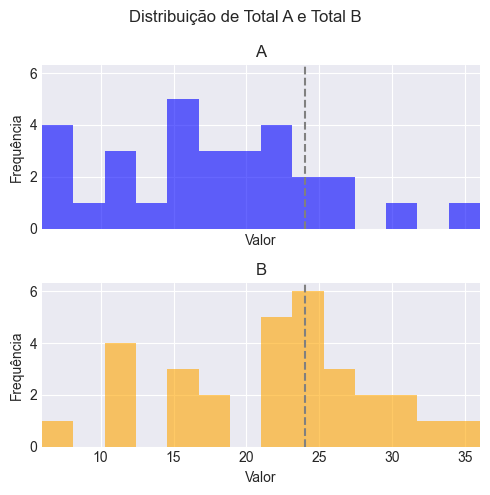

In [67]:
data_1 = df['TOTAL A']
data_2 = df['TOTAL B']

# Determine common bin range for both datasets
min_val = min(min(data_1), min(data_2))
max_val = max(max(data_1), max(data_2))
bin_range = np.linspace(min_val, max_val, 15)

# Creating subplots for the histograms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5), sharex='col', sharey='col')
fig.suptitle('Distribuição de Total A e Total B')

# Plotting histogram for variable 1 on the first subplot (ax1)
ax1.hist(data_1, bins=bin_range, color='blue', alpha=0.6)
ax1.vlines(24, ymin = 0, ymax = 1, color = 'grey', linestyle = '--',transform=ax1.get_xaxis_transform())
ax1.set_title('A')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Frequência')

# Plotting histogram for variable 2 on the second subplot (ax2)
ax2.hist(data_2, bins=bin_range, color='orange', alpha=0.6)
ax2.vlines(24, ymin = 0, ymax = 1, color = 'grey', linestyle = '--',transform=ax2.get_xaxis_transform())
ax2.set_title('B')
ax2.set_xlabel('Valor')
ax2.set_ylabel('Frequência')

# Set the same x-axis range for both subplots
ax1.set_xlim(min_val, max_val)
ax2.set_xlim(min_val, max_val)

# Displaying the histograms
plt.tight_layout()
plt.show()

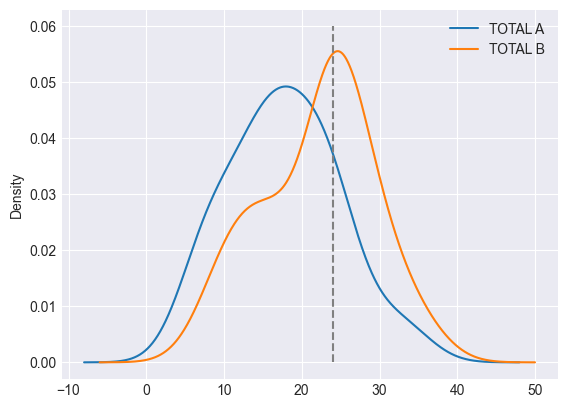

In [50]:
ax = df[['TOTAL A','TOTAL B']].plot.kde()
ax.vlines(24, ymin = 0, ymax = 0.06, color = 'grey', linestyle = '--')

Distribuição das diferenças entre A e B em cada paciente

73.3% pontuaram mais em B do que em A


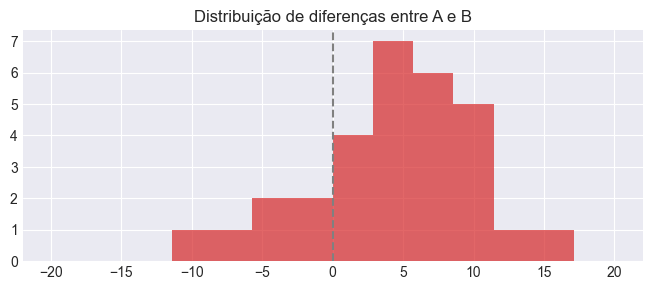

In [19]:
b_minus_a = df['TOTAL B'] - df['TOTAL A']
b_greater_than_a = (b_minus_a>0).sum()*100/len(b_minus_a)
print(f'{b_greater_than_a:.1f}% pontuaram mais em B do que em A')
# hist
bin_range = np.linspace(-20, 20, 15)
fig,ax = plt.subplots(figsize=(8,3))
plt.title('Distribuição de diferenças entre A e B')
plt.hist(b_minus_a, bins = bin_range, alpha=0.7, color = 'C3')
ax.vlines(0, ymin = 0, ymax = 1, color = 'grey', linestyle = '--',transform=ax.get_xaxis_transform())
plt.show()

Casos com maior diferença entre A e B

In [20]:
# maior diferença com B > A
id_max = b_minus_a.argmax()
df.iloc[id_max]

ID             23
IDADE          33
GENERO          M
A1              0
A2              0
A3              2
A4              3
A5              0
A6              1
A7              0
A8              4
A9              1
B1              4
B2              4
B3              4
B4              4
B5              4
B6              4
B7              3
B8              0
B9              1
TOTAL A        11
TOTAL B        28
TOTAL GERAL    39
Name: 22, dtype: object

In [21]:
# maior diferença com B < A
id_max = b_minus_a.argmin()
df.iloc[id_max]

ID             25
IDADE          51
GENERO          M
A1              4
A2              4
A3              4
A4              4
A5              4
A6              4
A7              4
A8              4
A9              2
B1              4
B2              3
B3              3
B4              2
B5              2
B6              1
B7              1
B8              4
B9              4
TOTAL A        34
TOTAL B        24
TOTAL GERAL    58
Name: 24, dtype: object

Pontos totais

Diferença entre o somatório de total B e total A: 128 (24.1% de A)


<BarContainer object of 2 artists>

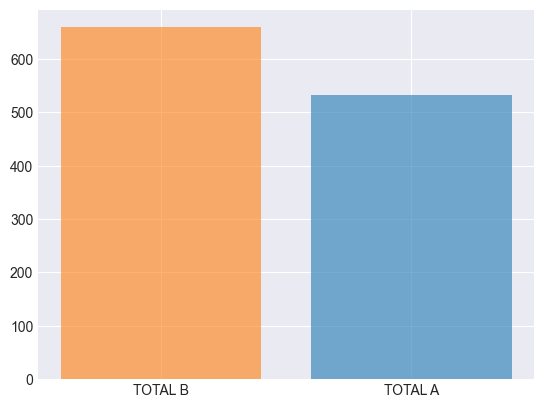

In [68]:
total_ab_points = df[['TOTAL A', 'TOTAL B']].sum().sort_values(ascending=False)
diff_ab = total_ab_points['TOTAL B'] - total_ab_points['TOTAL A']
diff_relative = diff_ab*100/total_ab_points['TOTAL A']
print(f'Diferença entre o somatório de total B e total A: {diff_ab} ({diff_relative:.1f}% de A)')
#plt.figure(figsize = (8, 3))
plt.bar(x = total_ab_points.index, height = total_ab_points.values, alpha = 0.6, color = ['C1','C0']) #width=0.3

## Análise de sintomas

### Sintomas com maior somatório

<BarContainer object of 18 artists>

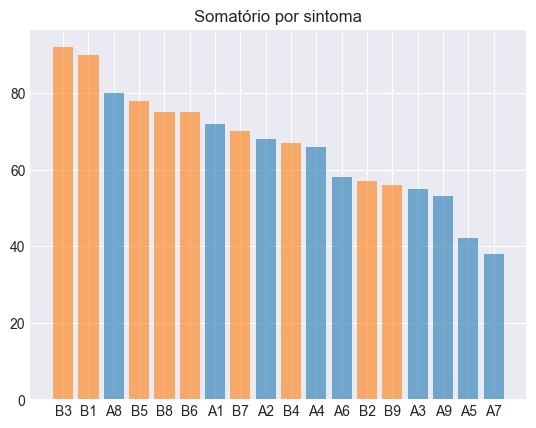

In [71]:
# somatório faz sentido por se tratar de escala likert?
questions_points = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1).sum().sort_values(ascending=False)
symptom_type = [s[0] for s in questions_points.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Somatório por sintoma')
plt.bar(x = questions_points.index, height = questions_points.values, alpha = 0.6, color = colors)

### Moda de cada sintoma

In [24]:
questions_modes = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1).mode()
questions_modes

,A1,A2,A3,A4,A5,A6,A7,A8,A9,B1,B2,B3,B4,B5,B6,B7,B8,B9
0,2.0,2,1.0,3.0,0.0,1.0,0.0,4.0,1.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,0.0
1,NaN,3,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A2 possui 3 modas

<BarContainer object of 18 artists>

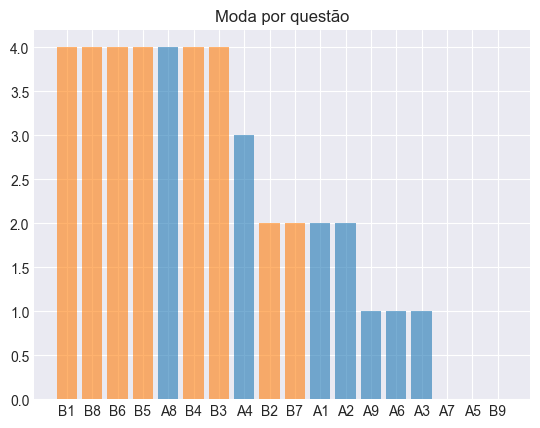

In [25]:
ordered_modes = questions_modes.iloc[0].sort_values(ascending=False)
symptom_type = [s[0] for s in ordered_modes.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Moda por questão')
plt.bar(x = ordered_modes.index, height = ordered_modes.values, alpha = 0.6, color = colors)

5 dos 6 sintomas mais que mais pontuaram 4 são do tipo B. Todos sintomas cuja pontuação mais frequente é 1 e 0 são A.

### Contagem por valor

<BarContainer object of 18 artists>

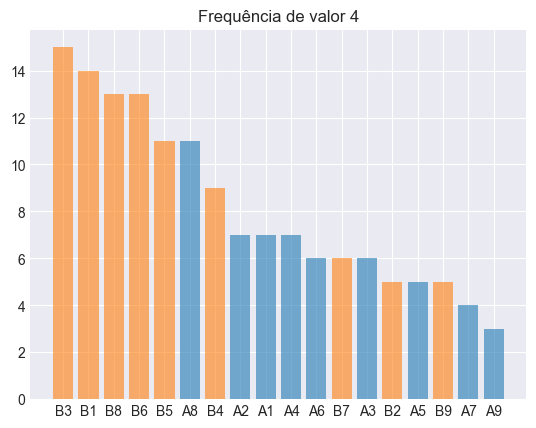

In [38]:
# contagem de 4
df_questions = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1)
df_count_4 = (df_questions==4).sum().sort_values(ascending=False)
symptom_type = [s[0] for s in df_count_4.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Frequência de valor 4')
plt.bar(x = df_count_4.index, height = df_count_4.values, alpha = 0.6, color = colors)

<BarContainer object of 18 artists>

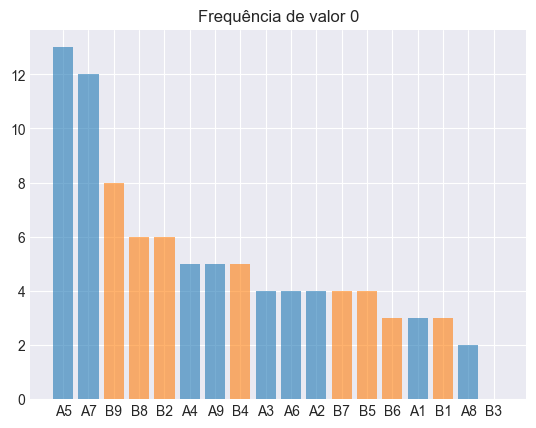

In [41]:
# contagem de 0
df_questions = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1)
df_count_4 = (df_questions==0).sum().sort_values(ascending=False)
symptom_type = [s[0] for s in df_count_4.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Frequência de valor 0')
plt.bar(x = df_count_4.index, height = df_count_4.values, alpha = 0.6, color = colors)

<BarContainer object of 18 artists>

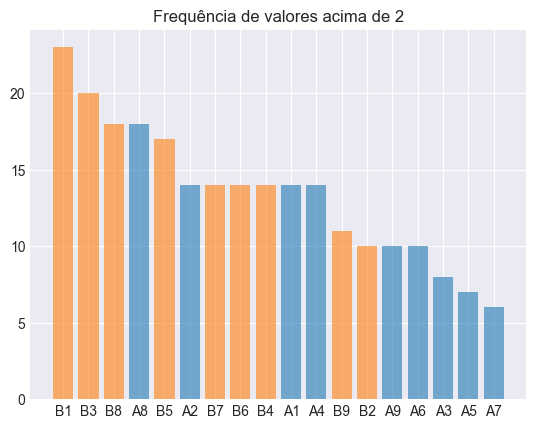

In [52]:
# contagem de valores acima de 2
df_questions = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1)
df_count_4 = (df_questions>2).sum().sort_values(ascending=False)
symptom_type = [s[0] for s in df_count_4.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Frequência de valores acima de 2')
plt.bar(x = df_count_4.index, height = df_count_4.values, alpha = 0.6, color = colors)

<BarContainer object of 18 artists>

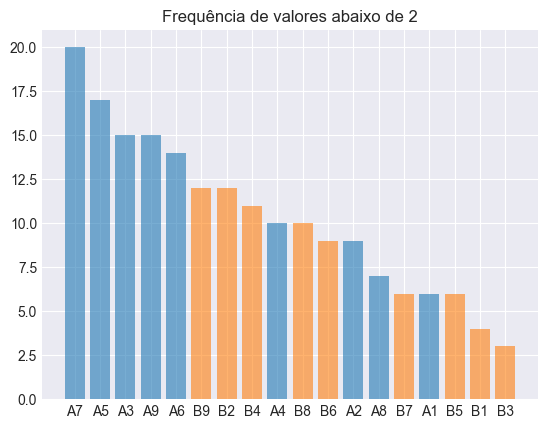

In [70]:
# contagem de valores abaixo de 2
df_questions = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1)
df_count_4 = (df_questions<2).sum().sort_values(ascending=False)
symptom_type = [s[0] for s in df_count_4.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Frequência de valores abaixo de 2')
plt.bar(x = df_count_4.index, height = df_count_4.values, alpha = 0.6, color = colors)

### Distribuição por sintomas

Text(0.5, 1.0, 'Distribuição de A')

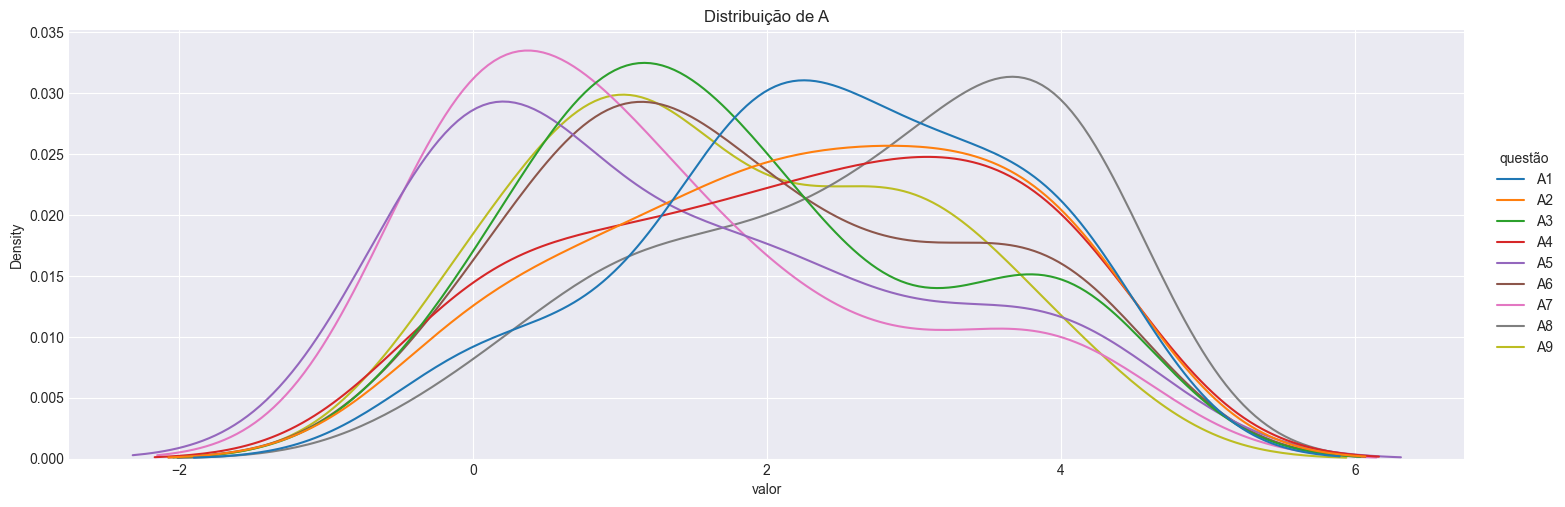

In [76]:
a_questions = [c for c in df.columns if c.startswith('A')]
question_name = []
value = []
for a_question in a_questions:
    l = list(df[a_question])
    value += l
    question_name += [a_question]*len(l)
df_a = pd.DataFrame({'questão':question_name, 'valor':value})
sns.displot(df_a, x = 'valor', hue = 'questão', kind = 'kde', height=5, aspect=3)
plt.title("Distribuição de A")
    

Text(0.5, 1.0, 'Distribuição de B')

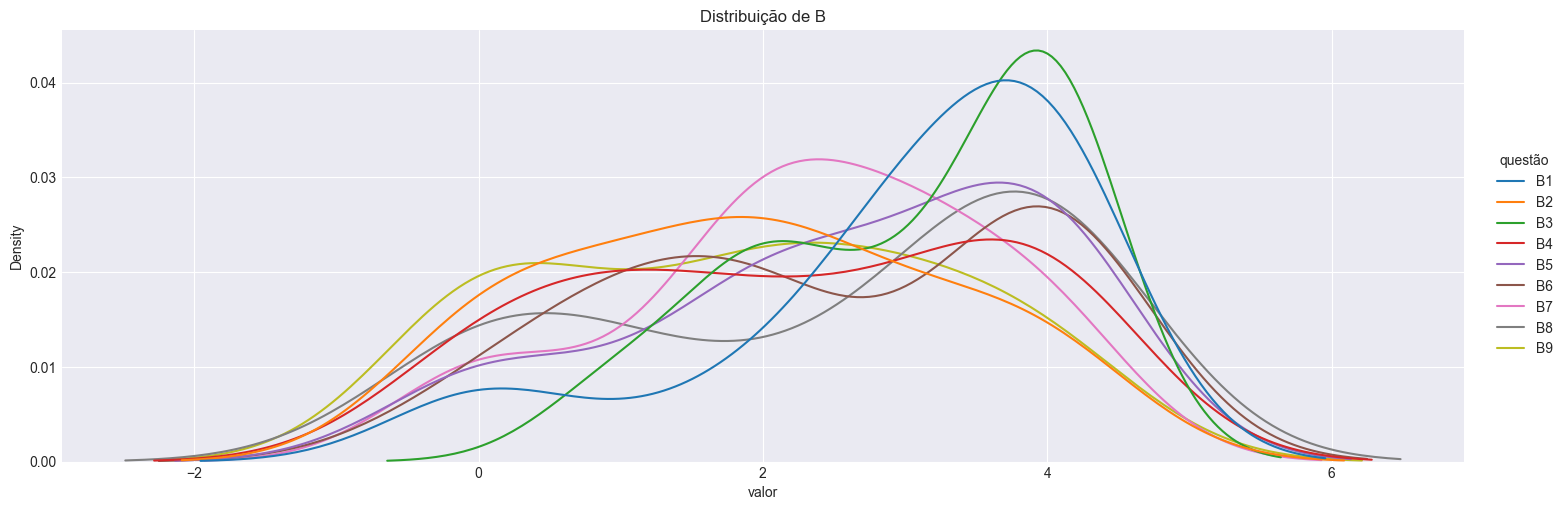

In [75]:
b_questions = [c for c in df.columns if c.startswith('B')]
question_name = []
value = []
for a_question in b_questions:
    l = list(df[a_question])
    value += l
    question_name += [a_question]*len(l)
df_a = pd.DataFrame({'questão':question_name, 'valor':value})
sns.displot(df_a, x = 'valor', hue = 'questão', kind = 'kde', height=5, aspect=3)
plt.title("Distribuição de B")

# Correlação

<Axes: >

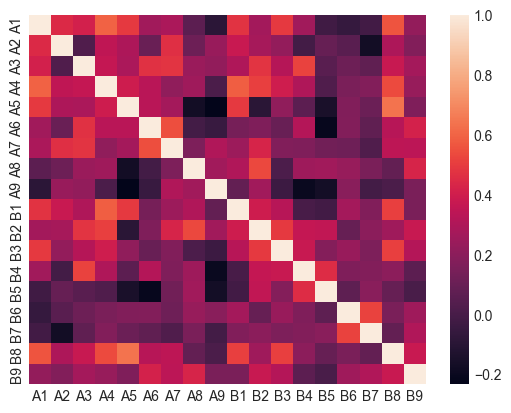

In [78]:
sns.heatmap(df_questions.corr())

<Axes: >

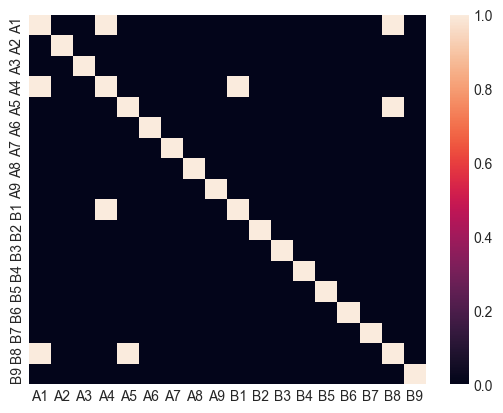

In [86]:
sns.heatmap(df_questions.corr() > 0.55)

<Axes: >

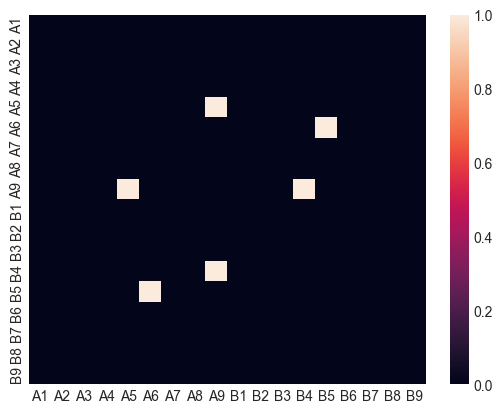

In [96]:
sns.heatmap(df_questions.corr() < -0.20)

Correlação positiva (> 0.55)
- A1 e A4
- A1 e B8
- A5 e B8
- A4 e B1

Fraca correlação negativa (< -0.2)
- A5 e A9
- A6 e B5
- A9 e B4

## Gênero

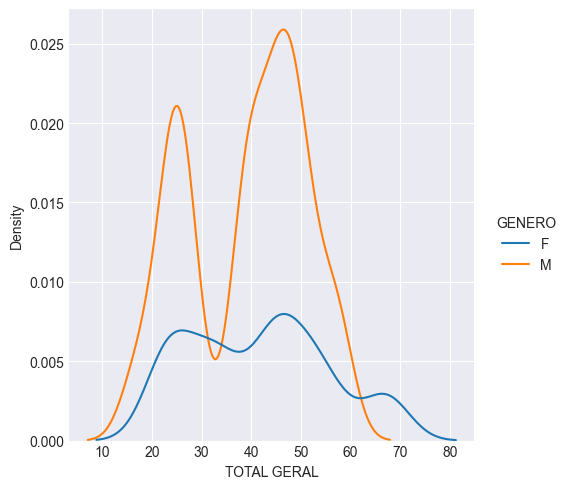

In [181]:
# total geral
sns.displot(df, x="TOTAL GERAL", hue="GENERO", kind="kde", bw_adjust=.5)

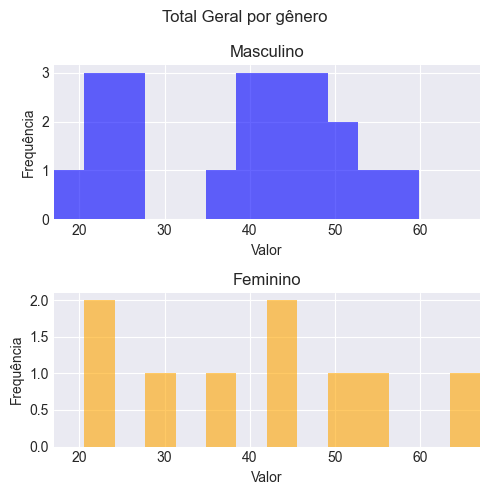

In [42]:
data_m = df[df['GENERO']=='M']['TOTAL GERAL']
data_f = df[df['GENERO']=='F']['TOTAL GERAL']

# Determine common bin range for both datasets
min_val = min(min(data_m), min(data_f))
max_val = max(max(data_m), max(data_f))
bin_range = np.linspace(min_val, max_val, 15)

# Creating subplots for the histograms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))
fig.suptitle('Total Geral por gênero')

# Plotting histogram for variable 1 on the first subplot (ax1)
ax1.hist(data_m, bins=bin_range, color='blue', alpha=0.6)
ax1.set_title('Masculino')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Frequência')

# Plotting histogram for variable 2 on the second subplot (ax2)
ax2.hist(data_f, bins=bin_range, color='orange', alpha=0.6)
ax2.set_title('Feminino')
ax2.set_xlabel('Valor')
ax2.set_ylabel('Frequência')

# Set the same x-axis range for both subplots
ax1.set_xlim(min_val, max_val)
ax2.set_xlim(min_val, max_val)

# Displaying the histograms
plt.tight_layout()
plt.show()

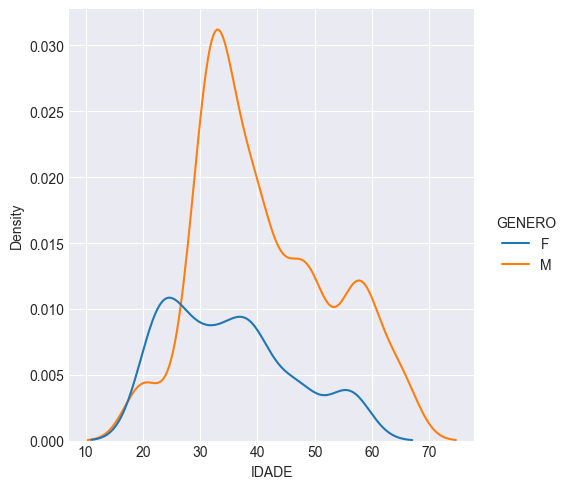

In [62]:
# idade
sns.displot(df, x="IDADE", hue="GENERO", kind="kde", bw_adjust=.5)

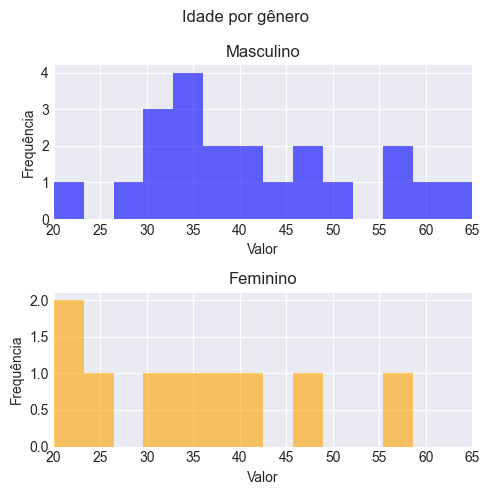

In [43]:
data_m = df[df['GENERO']=='M']['IDADE']
data_f = df[df['GENERO']=='F']['IDADE']

# Determine common bin range for both datasets
min_val = min(min(data_m), min(data_f))
max_val = max(max(data_m), max(data_f))
bin_range = np.linspace(min_val, max_val, 15)

# Creating subplots for the histograms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))
fig.suptitle('Idade por gênero')

# Plotting histogram for variable 1 on the first subplot (ax1)
ax1.hist(data_m, bins=bin_range, color='blue', alpha=0.6)
ax1.set_title('Masculino')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Frequência')

# Plotting histogram for variable 2 on the second subplot (ax2)
ax2.hist(data_f, bins=bin_range, color='orange', alpha=0.6)
ax2.set_title('Feminino')
ax2.set_xlabel('Valor')
ax2.set_ylabel('Frequência')

# Set the same x-axis range for both subplots
ax1.set_xlim(min_val, max_val)
ax2.set_xlim(min_val, max_val)

# Displaying the histograms
plt.tight_layout()
plt.show()

# Ideias
- perguntas que mais/menos pontuaram
- ordenar questões pelas que pontuaram mais 4
- distribuição dos sintomas
- < 24 (A ou B)?
- média de idade
- valores extremos, binários
- vale a pena investigar tdah para dependencia química?
- correlação entre As e B's
- Cluster
- análise de regressão

Medidas de tendência central: Você pode calcular a média, mediana e moda para entender a tendência central das respostas.

Medidas de dispersão: O cálculo de desvio padrão, amplitude e quartis pode ajudar a compreender a dispersão das respostas em torno da tendência central.

Testes de hipóteses: Testes estatísticos não paramétricos, como o teste de Mann-Whitney ou o teste de Wilcoxon, podem ser utilizados para comparar grupos independentes ou relacionados.

Análise de variância (ANOVA): A ANOVA pode ser aplicada quando há mais de dois grupos para determinar se existem diferenças estatisticamente significativas entre eles.

Análise de regressão: Pode-se realizar análises de regressão para explorar as relações entre variáveis independentes e dependentes, considerando a escala Likert como uma variável dependente ordinal.

Análise fatorial: A análise fatorial pode ser aplicada para explorar a estrutura subjacente das respostas da escala Likert e identificar possíveis dimensões ou fatores subjacentes.

Coeficiente de correlação: O coeficiente de correlação de Spearman ou Kendall pode ser usado para avaliar a relação monotônica entre variáveis ordinais.

Análise de cluster: Pode-se realizar a análise de cluster para identificar grupos ou padrões nos dados da escala Likert